In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Read the Dataset

In [3]:
df = pd.read_csv('data.csv')

In [6]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


Data Exploration

In [8]:
# Shape dari dataset
df.shape

(10337, 2)

In [9]:
# Melihat kolom yang ada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [10]:
# Melihat apakah ada data yang kosong
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [11]:
# Melihat apakah ada data yang duplikat
df.duplicated().sum()

66

In [12]:
# Menghapus data yang duplikat
df.drop_duplicates(inplace=True)

Data setelah di preprocessing

In [13]:
df.shape

(10271, 2)

Statistik Data

In [14]:
df.describe()

,Text,Language
count,10271,10271
unique,10267,17
top,slår mig.,English
freq,2,1382


In [29]:
# Melihat distribusi persentase dari kolom Language
data = df['Language'].value_counts().reset_index()
data.columns = ['Language', 'Count']

data

,Language,Count
0,English,1382
1,French,1007
2,Spanish,816
3,Portugeese,736
4,Italian,694
5,Russian,688
6,Sweedish,673
7,Malayalam,591
8,Dutch,542
9,Arabic,532


In [39]:
data['Percentage'] = data['Count'].apply(lambda x: 100*x/sum(data['Count']))
data

,Language,Count,Percentage
0,English,1382,13.455360
1,French,1007,9.804303
2,Spanish,816,7.944699
3,Portugeese,736,7.165807
4,Italian,694,6.756888
5,Russian,688,6.698471
6,Sweedish,673,6.552429
7,Malayalam,591,5.754065
8,Dutch,542,5.276993
9,Arabic,532,5.179632


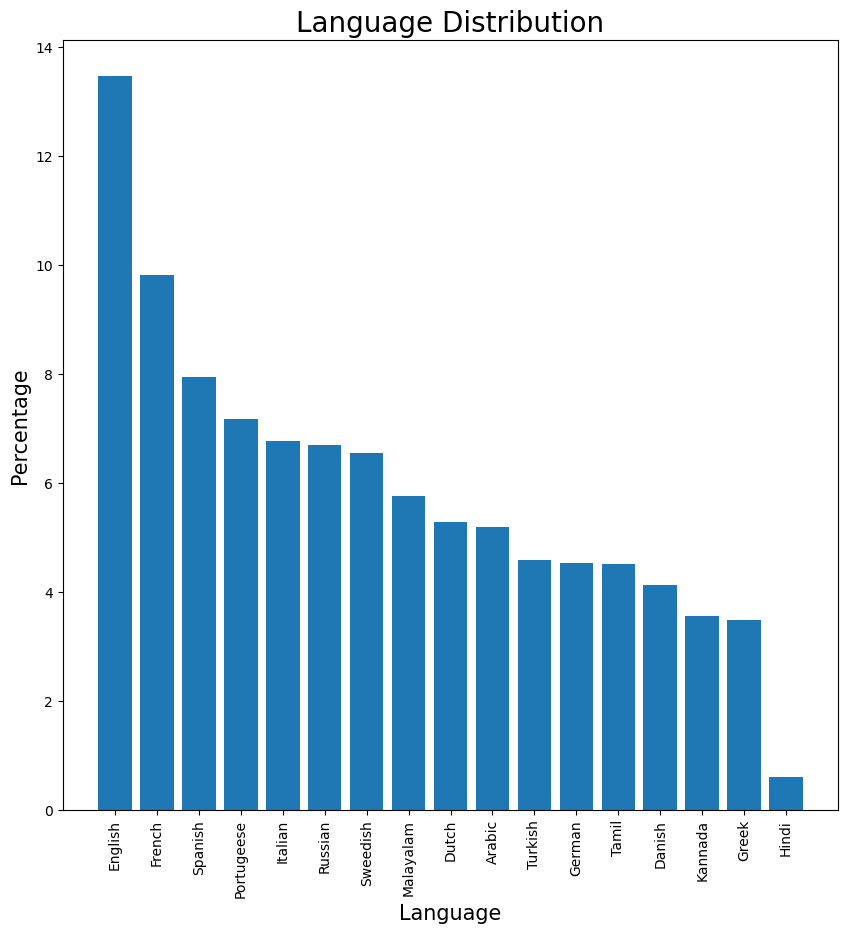

In [43]:
# Plot distribusi persentase dari kolom Language dalam bar chart
plt.figure(figsize=(10, 10))
plt.bar(data['Language'], data['Percentage'])
plt.title('Language Distribution', fontsize=20)
plt.xlabel('Language', fontsize=15)
plt.ylabel('Percentage', fontsize=15)
plt.xticks(rotation=90)
plt.show()

Data terbanyak adalah data berbahasa English

### Text Processing

Bersihkan data dari karakter yang tidak diperlukan

In [56]:
import string 
def remove_unwanted_char(text):
    text = re.sub(r'\d+', '', text)
    text = [i for i in text if i not in string.punctuation]
    text = ''.join(text)
    text = text.lower()
    return text

df['cleaned_text'] = df['Text'].apply(lambda x: remove_unwanted_char(x))

In [57]:
df

,Text,Language,cleaned_text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the physi...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎಲ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [84]:
X = df['cleaned_text']
y = df['Language']

In [103]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### Bag of Words

In [111]:
cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(df['cleaned_text']).toarray()

In [112]:
X.shape

(10271, 39928)

### Train Test Split

In [113]:
x_train, x_test, y_train, y_test = train_test_split(X, df['Language'], test_size=0.2, random_state=42)

In [114]:
print(f"x train shape: {x_train.shape}")
print(f"x test shape: {x_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")


x train shape: (8216, 39928)
x test shape: (2055, 39928)
y train shape: (8216,)
y test shape: (2055,)


### Models

Random Forest

In [115]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [116]:
models = {
    'MultinomialNB': MultinomialNB(),
    'RandomForestClassifier': RandomForestClassifier(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

def train_test_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
    
for name, model in models.items():
    print(f"Training model: {name}")
    train_test_model(model, x_train, x_test, y_train, y_test)


Training model: MultinomialNB


In [110]:

def predict(model, text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    return lang[0]

text_english = "I love python"
text_french = "J'aime python"
text_spanish = "Me encanta python"

predict(models['MultinomialNB'], text_english)

# for name, model in models.items():
#     print(f"Model: {name}")
#     print(f"Prediction for text_english: {predict(model, text_english)}")
#     print(f"Prediction for text_french: {predict(model, text_french)}")
#     print(f"Prediction for text_spanish: {predict(model, text_spanish)}")
#     print("")

ValueError: y contains previously unseen labels: ['English']